# Remplir les NaN par Sardor

# Import 

In [33]:
import seaborn as sns
import pandas as pd
import numpy as np
import zipfile
from matplotlib import pyplot as plt
import re
import sweetviz as sv
from scipy.stats import skew
from math import *

from fonction_import_data import afficher_fichier_zip, import_data, readme

# Lecture des données

## Chemin où est stocké le dossier DATA1.zip

In [2]:
path = '/Users/sardor/Documents/PIP_2022NA/'

## Import des données

In [3]:
#Arborescence des fichiers 
afficher_fichier_zip(path, 'DATA1.zip')

['DATA1/',
 'DATA1/DONNEES_BRUTES/',
 'DATA1/DONNEES_BRUTES/DATA_FRAUDE_LANGUEDOC.csv',
 'DATA1/DONNEES_BRUTES/DATA_FRAUDE_TOULOUSE.csv',
 'DATA1/DONNEES_CONCAT_TLSE-LD/',
 'DATA1/DONNEES_CONCAT_TLSE-LD/DATA1_COMPLET.csv',
 'DATA1/DONNEES_CONCAT_TLSE-LD/ID_FRAUDE.CSV',
 'DATA1/ECHANTILLONS/',
 'DATA1/ECHANTILLONS/ECHANTILLON10/',
 'DATA1/ECHANTILLONS/ECHANTILLON10/TRAIN/',
 'DATA1/ECHANTILLONS/ECHANTILLON10/TRAIN/x_train_10.csv',
 'DATA1/ECHANTILLONS/ECHANTILLON10/TRAIN/y_train_10.csv',
 'DATA1/ECHANTILLONS/ECHANTILLON10/TEST/',
 'DATA1/ECHANTILLONS/ECHANTILLON10/TEST/x_test_10.csv',
 'DATA1/ECHANTILLONS/ECHANTILLON10/TEST/y_test_10.csv',
 'DATA1/ECHANTILLONS/ECHANTILLON10/echantillon10.csv',
 'DATA1/ECHANTILLONS/ECHANTILLON50/',
 'DATA1/ECHANTILLONS/ECHANTILLON50/TRAIN/',
 'DATA1/ECHANTILLONS/ECHANTILLON50/TRAIN/x_train_50.csv',
 'DATA1/ECHANTILLONS/ECHANTILLON50/TRAIN/y_train_50.csv',
 'DATA1/ECHANTILLONS/ECHANTILLON50/TEST/',
 'DATA1/ECHANTILLONS/ECHANTILLON50/TEST/x_test_50.csv',
 

## Lecture du READ ME


In [4]:
readme(path, 'DATA1.zip', 'DATA1/README.txt')

b'\r\n'
b'Ce dossier ZIP contient :\r\n'
b'\t1- Un dossier "DONNEES_BRUTES"  :\r\n'
b'\t- DATA_FRAUDE_LANGUEDOC.csv et DATA_FRAUDE_TOULOUSE.csv : les jeux donnees bruts pour Toulouse et Languedoc fournis par le Credit Agricole sans aucune modification.\r\n'
b'\t2- Un dossier "DONNEES_CONCAT_TLSE-LD":\r\n'
b'\t- DATA1_COMPLET.csv : Concatenation des jeux de donnees Toulouse et Languedoc.\r\n'
b'\t- ID_FRAUDE.csv : fichier csv contenant les colonnes id et TOP_FRAUDE (fraude (1), pas fraude (0))\r\n'
b'\t3- Un dossier "ECHANTILLONS" : \r\n'
b"\t\tUn dossier ECHANTILLON10 --> ech10.CSV echantillon de 10% des donn\xc3\xa9es concatenees (TLSE+LANGUEDOC) avec leurs jeux d'entrainement et de test.\r\n"
b"\t\tUn dossier ECHANTILLON50 --> ech50.csv echantillon de 50% des donn\xc3\xa9es concatenees (TLSE+LANGUEDOC) avec leurs jeux d'entrainement et de test.\r\n"
b'\t4- - Dictionnaire_Data1.xlsx : Dictionnaire des donnees\r\n'
b'\r\n'
b'\r\n'
b'\r\n'
b'\r\n'
b'\r\n'
b'\r\n'
b'\r\n'
b'\r\n'


## Lecture fichier csv 

In [5]:
df = import_data(path, 'DATA1/DONNEES_CONCAT_TLSE-LD/DATA1_COMPLET.csv', 'DATA1.zip')

/var/folders/fz/s504p4md7hv8w1295wj7d20m0000gn/T/ipykernel_50080/1227951240.py:1: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  df = import_data(path, 'DATA1/DONNEES_CONCAT_TLSE-LD/DATA1_COMPLET.csv', 'DATA1.zip')


In [6]:
df.columns.get_loc("note_mire")

120

In [7]:
df_save = df

## Recherche de la méthode de remplissage

##  Pour la variable 'note_mire'

/opt/anaconda3/envs/pandas/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='note_mire'>

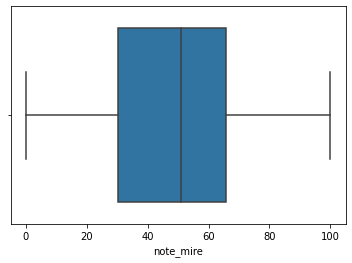

In [8]:
sns.boxplot(df.note_mire)


### Ici pas de valeures aberrantes donc on peut remplir en utilisant la méthode par moyenne

In [22]:
df['note_mire'] = df['note_mire'].fillna(df['note_mire'].mean())

## Pour la variable "note_FOpDebitrice"

/opt/anaconda3/envs/pandas/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='note_FOpDebitrice'>

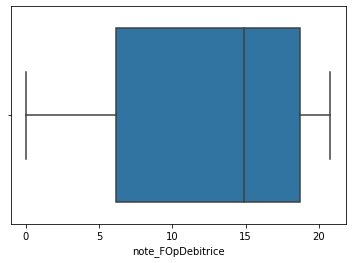

In [11]:
sns.boxplot(df.note_FOpDebitrice)



In [27]:
df['note_FOpDebitrice'].value_counts(normalize=True) * 100



20.77    21.304558
0.00     19.176825
18.69    12.585128
16.76    11.685895
6.18     10.419035
10.73     8.848247
13.05     8.079133
14.90     7.901180
Name: note_FOpDebitrice, dtype: float64

### Ici pas de valeures aberrantes mais cette variable a 8 valeurs distinctes, on utilise la méthode du mode, on remplacera la moitié par 20,77 et l'autre moitié par 0,00 car c'est les deux valeurs les plus fréquentes 

In [45]:
nb_nan = df.note_FOpDebitrice.isnull().sum(axis = 0)

0

In [43]:
df['note_FOpDebitrice'] = df['note_FOpDebitrice'].fillna(20.77, limit=floor(nb_nan/2)) #j'utilise ceil et floor dans le cas le nombre de NaN soit pas divisible par 2
df['note_FOpDebitrice'] = df['note_FOpDebitrice'].fillna(0.00, limit=ceil(nb_nan/2))



## Pour la variable "note_Funivers"

/opt/anaconda3/envs/pandas/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='note_Funivers'>

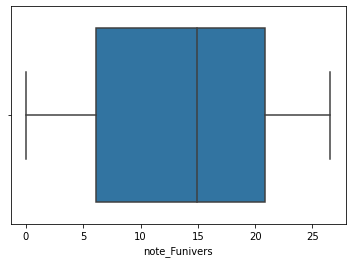

In [12]:
sns.boxplot(df.note_Funivers)



In [46]:
df['note_Funivers'].value_counts(normalize=True) * 100



14.90    33.336412
20.85    25.033743
6.10     18.445125
26.56    15.377785
0.00      7.806935
Name: note_Funivers, dtype: float64

### Exactement pareil que le précedent 

In [51]:
nb_nan = df.note_Funivers.isnull().sum(axis = 0)
nb_nan

0

In [50]:
df['note_Funivers'] = df['note_Funivers'].fillna(14.90, limit=floor(nb_nan/2)) #j'utilise ceil et floor dans le cas le nombre de NaN soit pas divisible par 2
df['note_Funivers'] = df['note_Funivers'].fillna(20.85, limit=ceil(nb_nan/2))

## Pour la variable note_Fassu

/opt/anaconda3/envs/pandas/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='note_Fassu'>

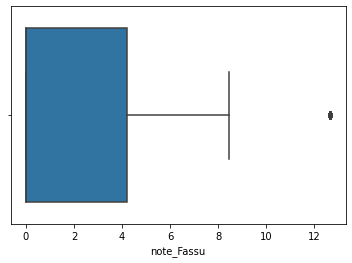

In [13]:
sns.boxplot(df.note_Fassu)

In [52]:
df['note_Fassu'].value_counts(normalize=True) * 100



0.00     63.199970
4.22     20.656447
8.44      8.926626
12.66     7.216957
Name: note_Fassu, dtype: float64

### Variable discrete + val aberrante donc meme chose, sauf qu'on remplace ici pas seulement le 1er mode

In [54]:
df['note_Fassu'] = df['note_Fassu'].fillna(df['note_Fassu'].mode()[0])

## Pour la variable note_Fcredit

/opt/anaconda3/envs/pandas/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='note_Fcredit'>

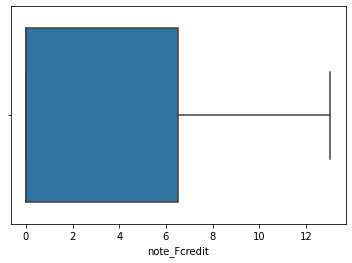

In [14]:
sns.boxplot(df.note_Fcredit)

In [55]:
df['note_Fcredit'].value_counts(normalize=True) * 100



0.00     74.337563
6.52     20.665445
13.05     4.996993
Name: note_Fcredit, dtype: float64

### Pareil que le précedent

In [56]:
df['note_Fcredit'] = df['note_Fcredit'].fillna(df['note_Fcredit'].mode()[0])

## Pour la variable "note_Fepargne"

/opt/anaconda3/envs/pandas/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='note_Fepargne'>

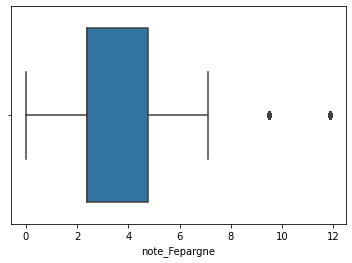

In [15]:
sns.boxplot(df.note_Fepargne)

In [58]:
df['note_Fepargne'].value_counts(normalize=True) * 100



2.38     31.610641
4.76     24.716910
0.00     19.513313
7.13     14.716886
9.51      7.801252
11.89     1.640998
Name: note_Fepargne, dtype: float64

### Pareil qu'avant : var discrete et val aberrante, le 1er mode est proche du 2nd on remplace par les deux

In [59]:
nb_nan = df.note_Fepargne.isnull().sum(axis = 0)
nb_nan

4738

In [60]:
df['note_Fepargne'] = df['note_Fepargne'].fillna(2.38, limit=floor(nb_nan/2)) #j'utilise ceil et floor dans le cas le nombre de NaN soit pas divisible par 2
df['note_Fepargne'] = df['note_Fepargne'].fillna(4.76, limit=ceil(nb_nan/2))

## Pour la variable "note_FService"

/opt/anaconda3/envs/pandas/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='note_FService'>

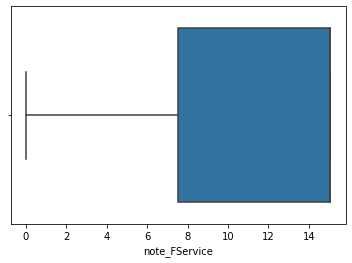

In [16]:
sns.boxplot(df.note_FService)

In [61]:
df['note_FService'].value_counts(normalize=True) * 100



15.06    60.112975
0.00     21.218838
7.53     18.668187
Name: note_FService, dtype: float64

### Val discrete on prend que le 1er mode 

In [62]:
df['note_FService'] = df['note_FService'].fillna(df['note_FService'].mode()[0])